In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
rent_data = pd.read_csv('/kaggle/input/house-rent-dataset/House_Rent_Dataset.csv')
rent_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
rent_data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [5]:
rent_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


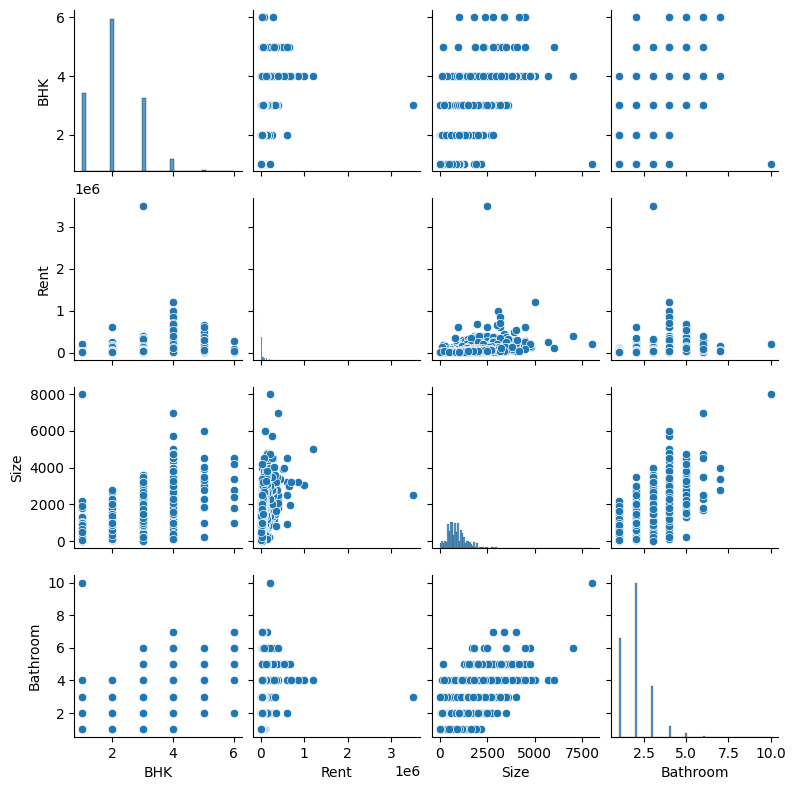

In [6]:
sns.pairplot(rent_data,height=2)
plt.show()

In [7]:
import pandas as pd
import plotly.express as px

# Assuming you have already loaded the 'rent_data' DataFrame

fig = px.histogram(rent_data, x='Rent', color_discrete_sequence=px.colors.qualitative.Set3, title="Rent Prices Distribution Histogram")
fig.show()

fig = px.box(rent_data, x="Rent", title='Boxplot for Rent Prices')
fig.show()

In [8]:
print(np.where(rent_data['Rent']>2000000))

(array([1837]),)


In [9]:
rent_data.drop([1837], axis=0, inplace=True)

fig = px.box(rent_data, x="Rent",title='Boxplot for Rent Prices')
fig.show()

In [10]:
rent_data['BHK'].value_counts()

BHK
2    2265
1    1167
3    1097
4     189
5      19
6       8
Name: count, dtype: int64

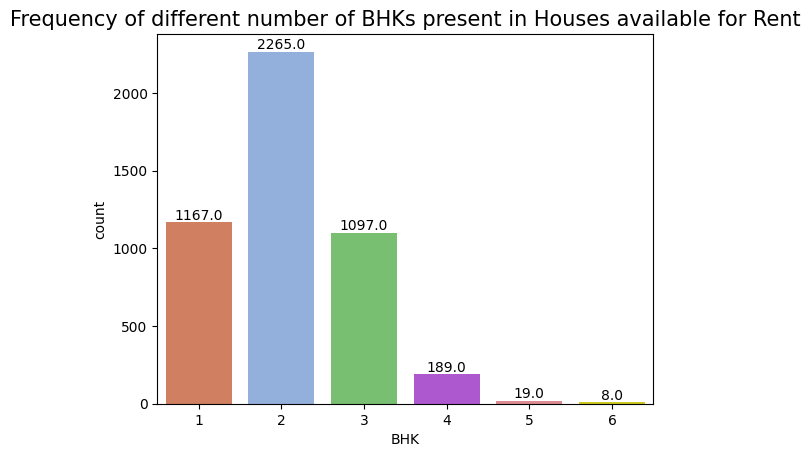

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(x='BHK', data=rent_data, palette=['#e3784d', '#87ace8', '#6ecc64', '#b644e3', '#eb7c87', '#EAE509'])

# Add labels to the bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.title('Frequency of different number of BHKs present in Houses available for Rent', fontsize=15)
plt.show()


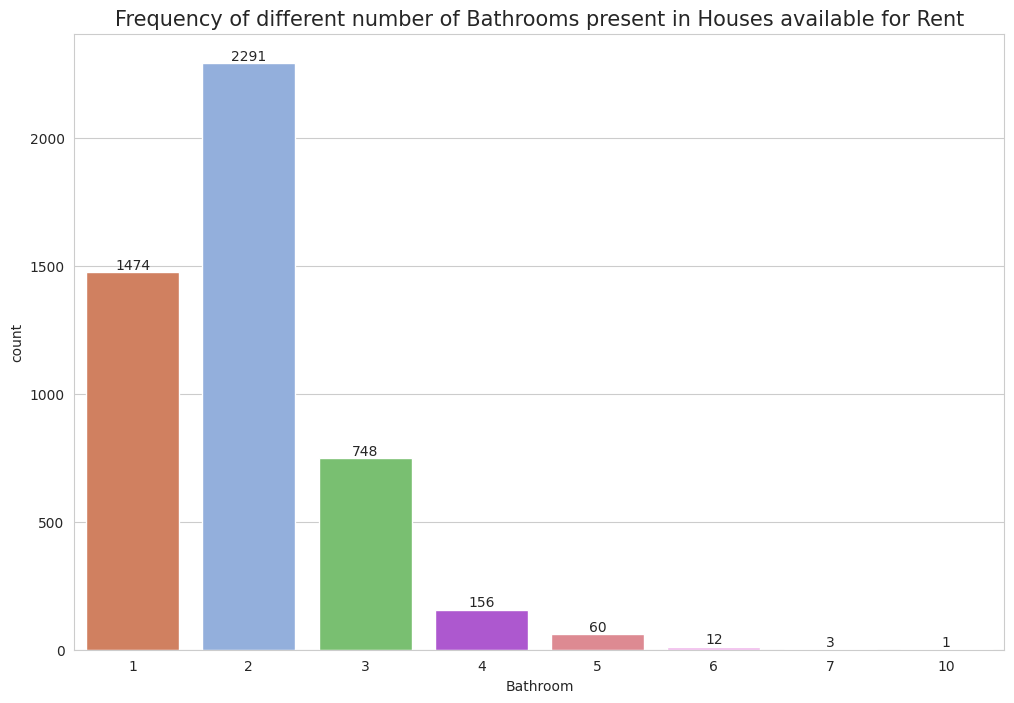

In [12]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509','#fab1f3','#86f7d7']

ax = sns.countplot(x='Bathroom',data=rent_data, palette=['#e3784d','#87ace8', '#6ecc64','#b644e3','#eb7c87','#fab1f3','#86f7d7','#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Frequency of different number of Bathrooms present in Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(rent_data, names='Bathroom', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for different number of Bathrooms present in Houses available for Rent')
fig.update_traces(textfont_size=15)
fig.show()

In [13]:
rent_data['City'].value_counts()

City
Mumbai       972
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

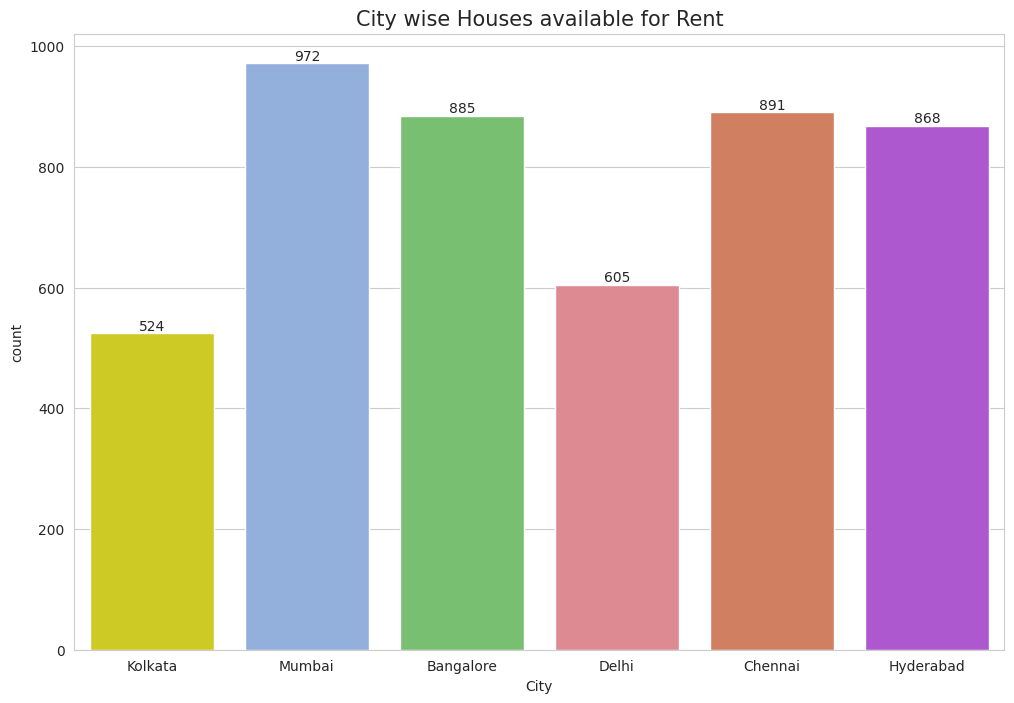

In [14]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='City',data=rent_data, palette=['#EAE509','#87ace8', '#6ecc64','#eb7c87','#e3784d','#b644e3'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('City wise Houses available for Rent',fontsize=15)
plt.show()

fig = px.pie(rent_data, names='City', height=700, width= 700, color_discrete_sequence=px.colors.sequential.deep, title='Pie Chart for Houses available for Rent in different cities')
fig.update_traces(textfont_size=15)
fig.show()

In [15]:
rent_data['Area Type'].value_counts()

Area Type
Super Area     2446
Carpet Area    2297
Built Area        2
Name: count, dtype: int64

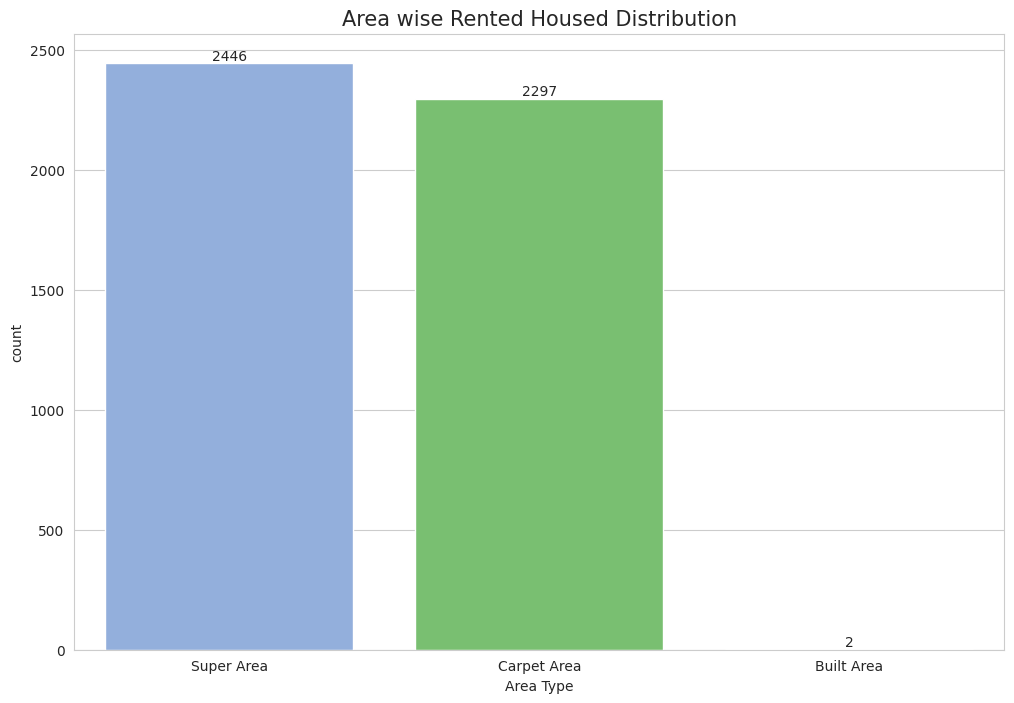

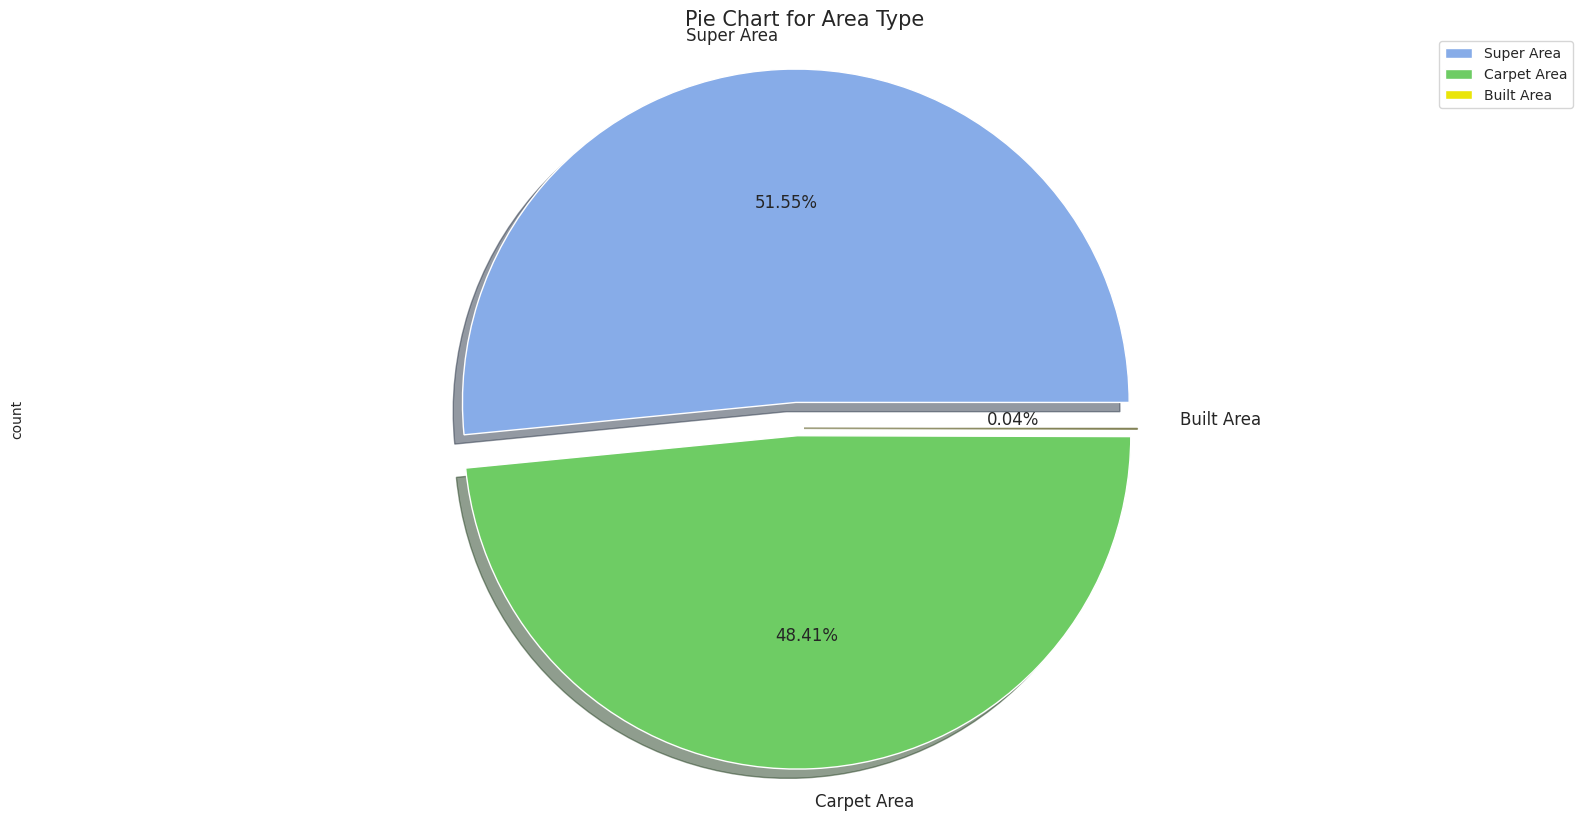

In [16]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Area Type',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Area wise Rented Housed Distribution',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Area Type'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()


In [17]:
rent_data['Point of Contact'].value_counts()

Point of Contact
Contact Owner      3216
Contact Agent      1528
Contact Builder       1
Name: count, dtype: int64

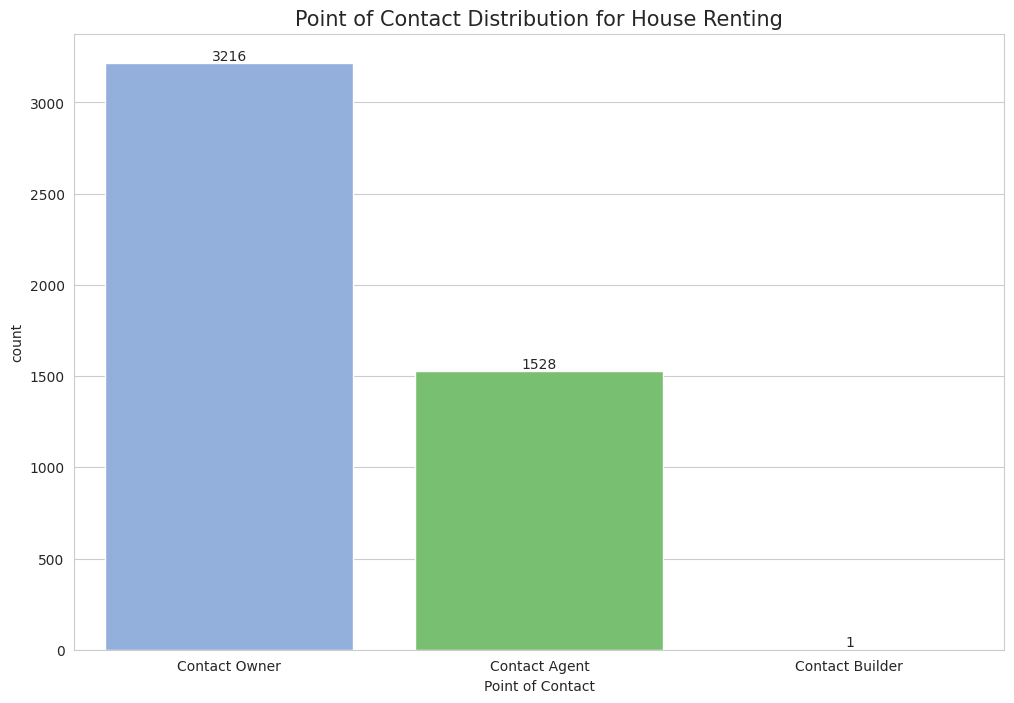

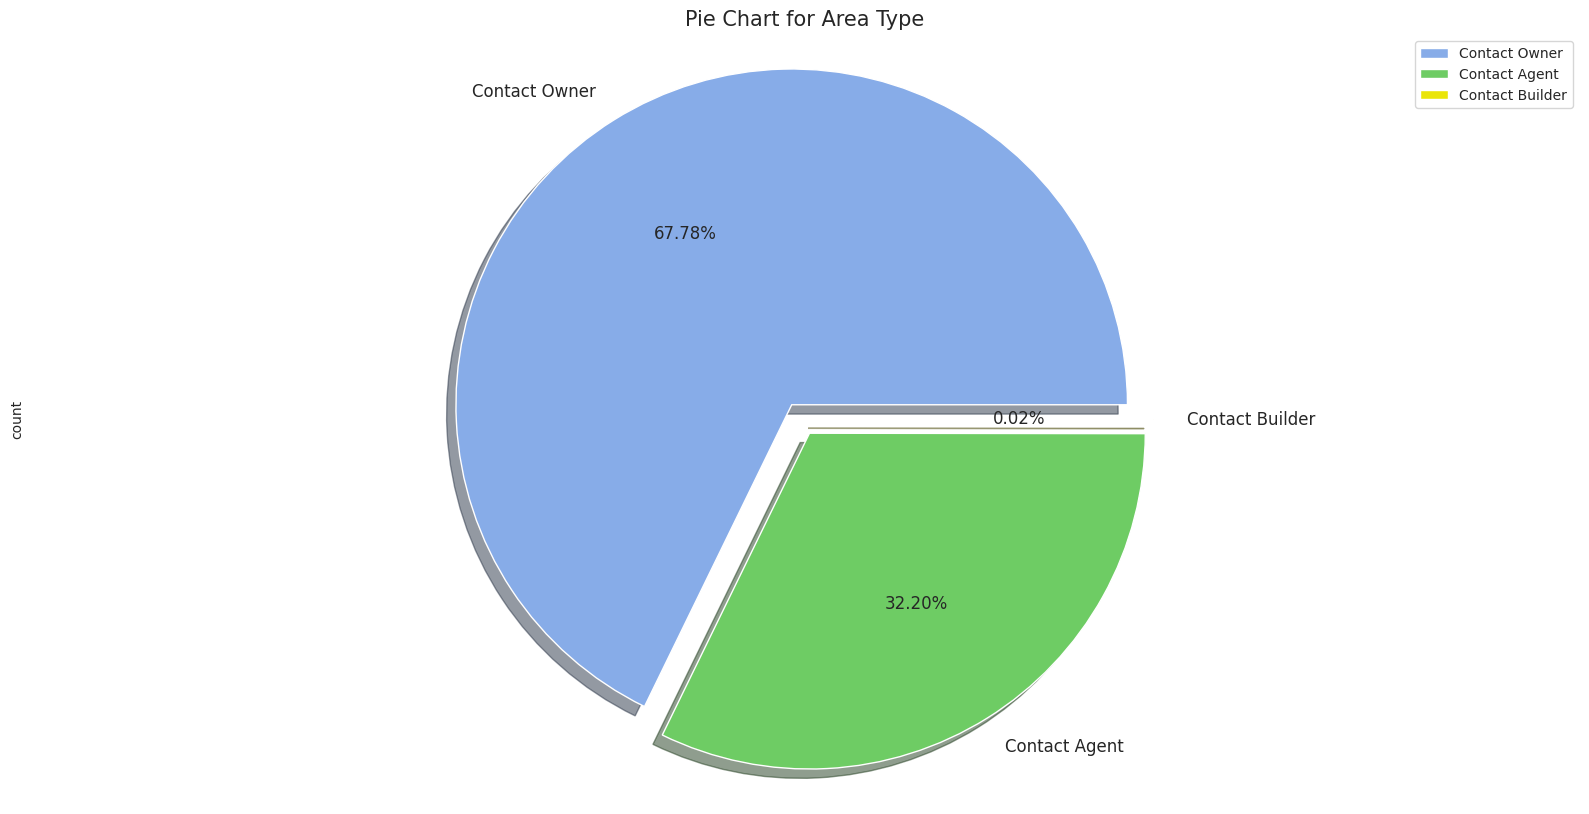

In [18]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Point of Contact',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Point of Contact Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Point of Contact'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Area Type',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

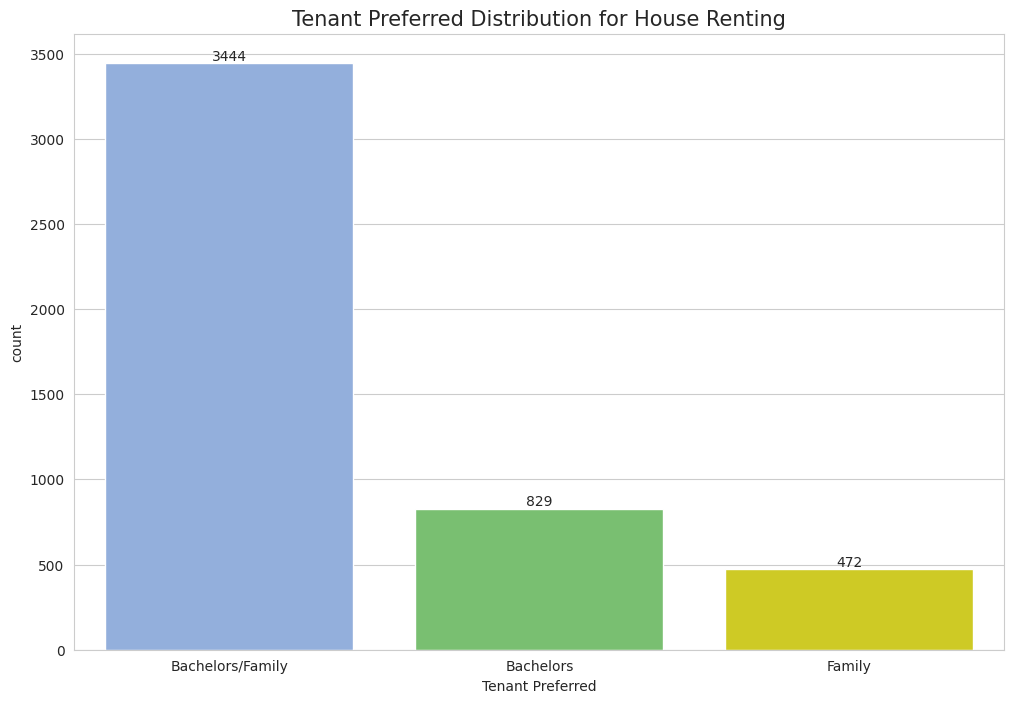

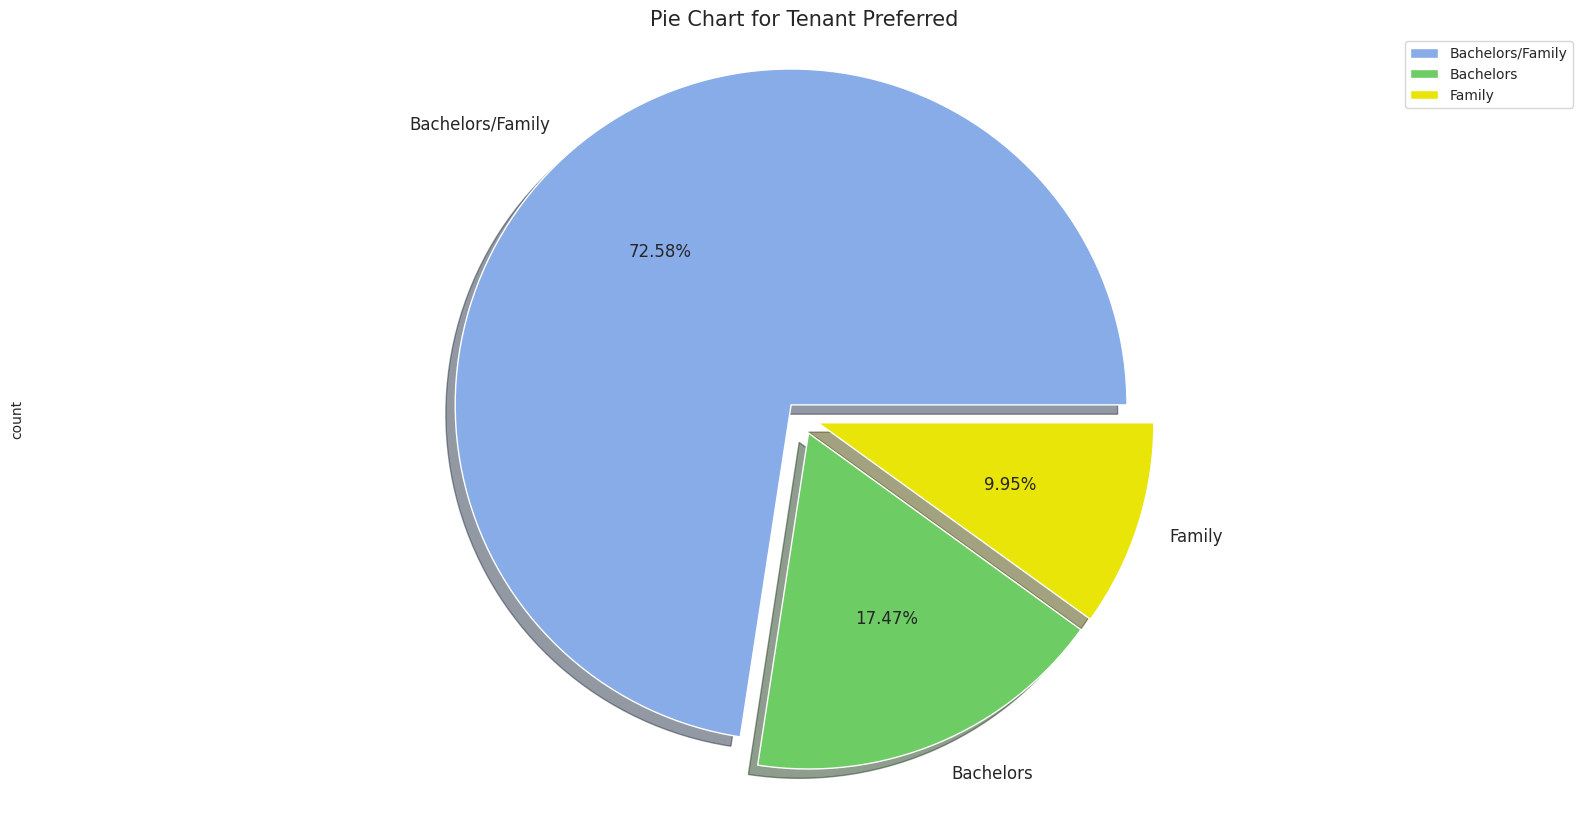

In [19]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Tenant Preferred',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Tenant Preferred Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Tenant Preferred'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Tenant Preferred',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

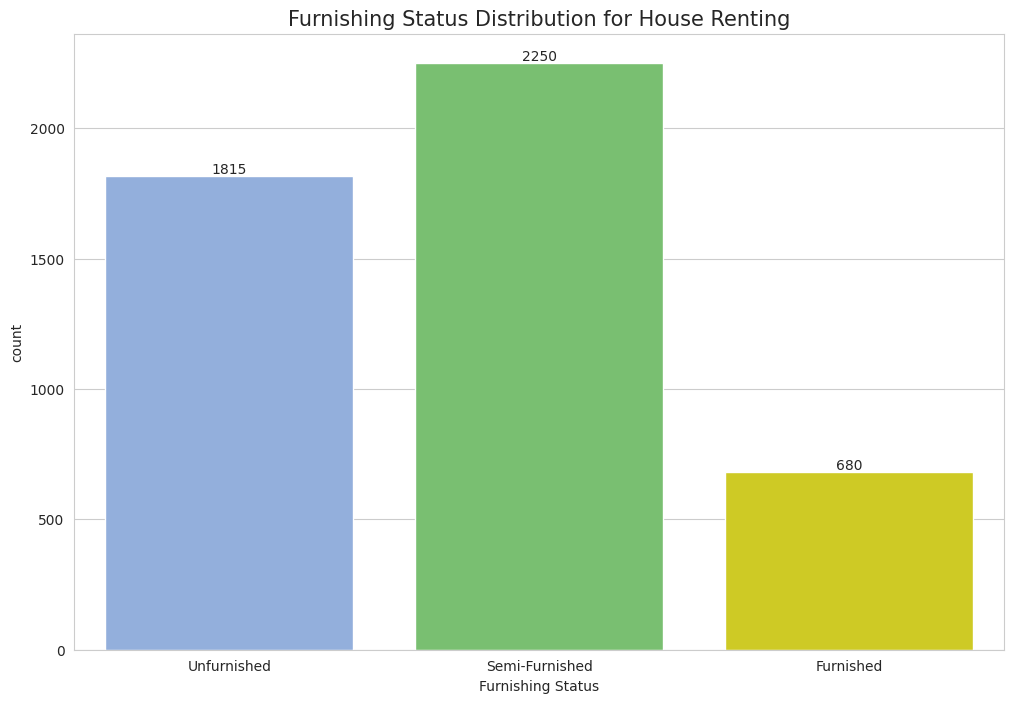

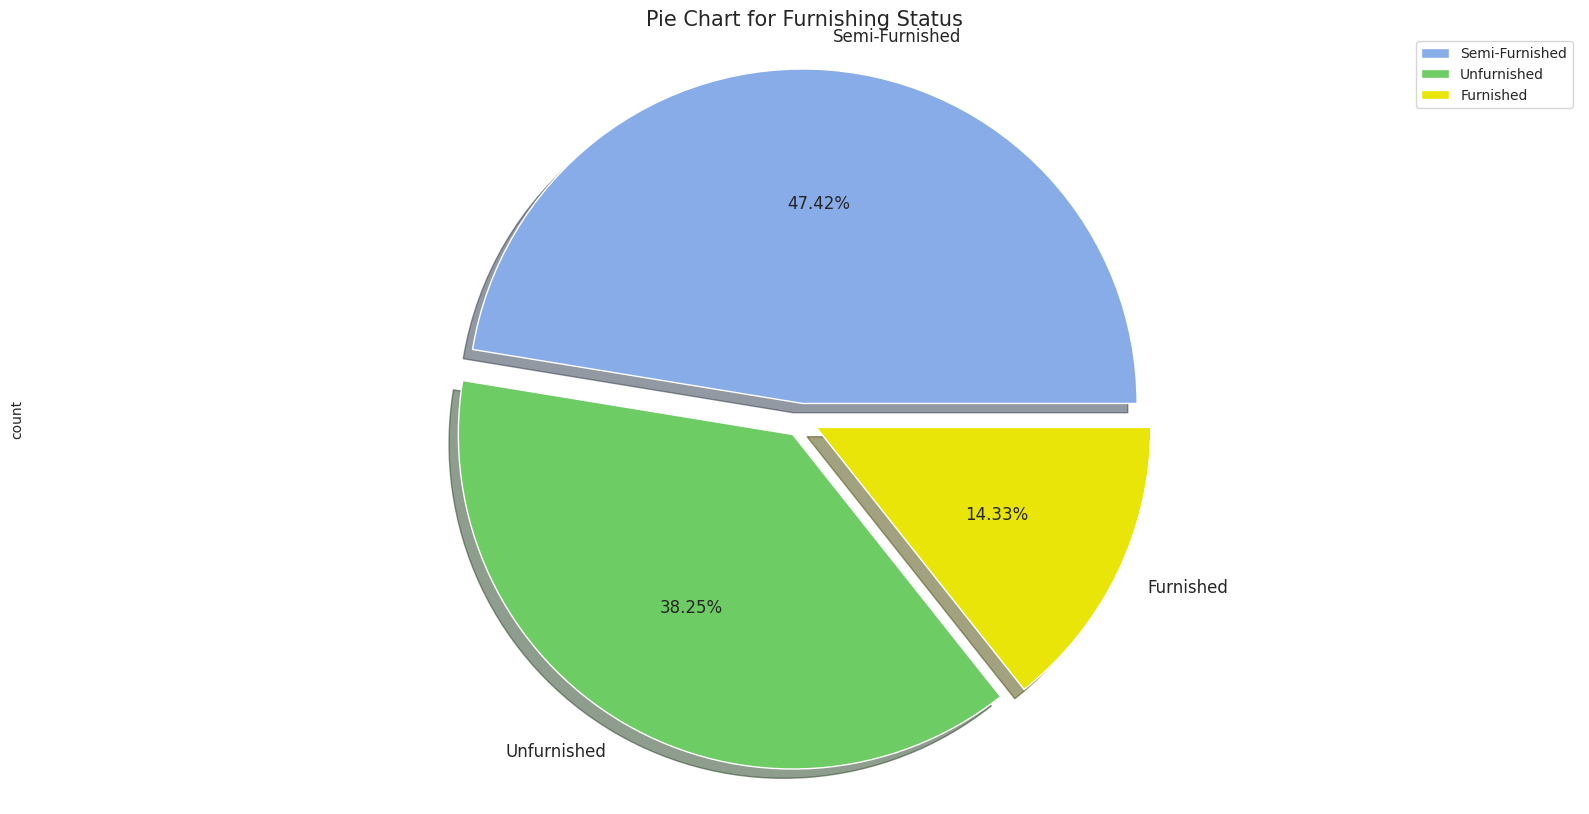

In [20]:
colors = ['#87ace8', '#6ecc64', '#EAE509']
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))

ax = sns.countplot(x='Furnishing Status',data=rent_data, palette=['#87ace8', '#6ecc64', '#EAE509'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Furnishing Status Distribution for House Renting',fontsize=15)
plt.show()

plt.figure(figsize = (20, 10)) 
rent_data['Furnishing Status'].value_counts().plot.pie(explode=[0.05, 0.05,0.05],textprops={'fontsize': 12}, autopct='%1.2f%%',colors=colors, shadow=True)
plt.title('Pie Chart for Furnishing Status',fontsize=15)
plt.axis('equal')
plt.legend( loc = "best")
plt.show()

In [21]:
fig = px.histogram(rent_data, x="Size", title='Size Distribution')
fig.show()
fig = px.box(rent_data, x="Size", title='Boxplot for Size')
fig.show()

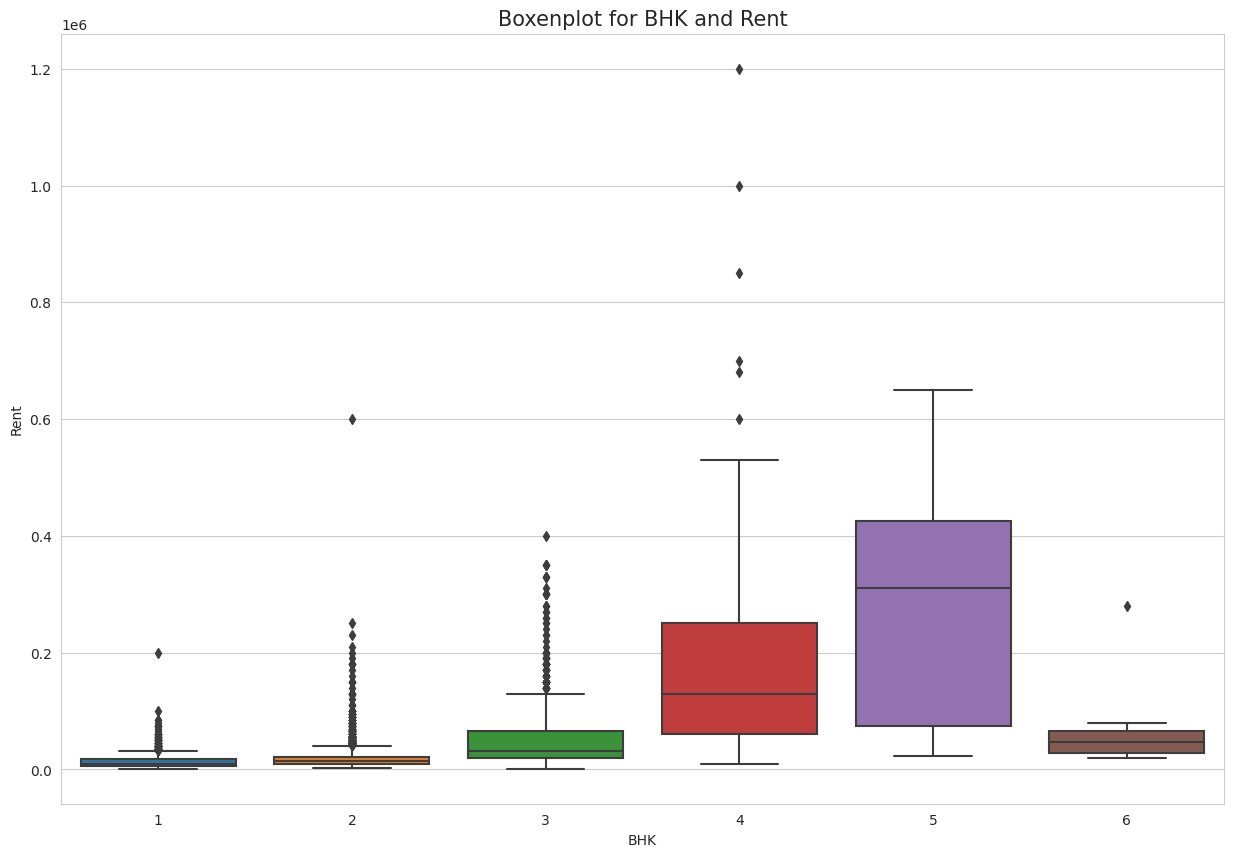

In [22]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(x="BHK", y='Rent',data=rent_data)
plt.title('Boxenplot for BHK and Rent',fontsize=15)
plt.show()

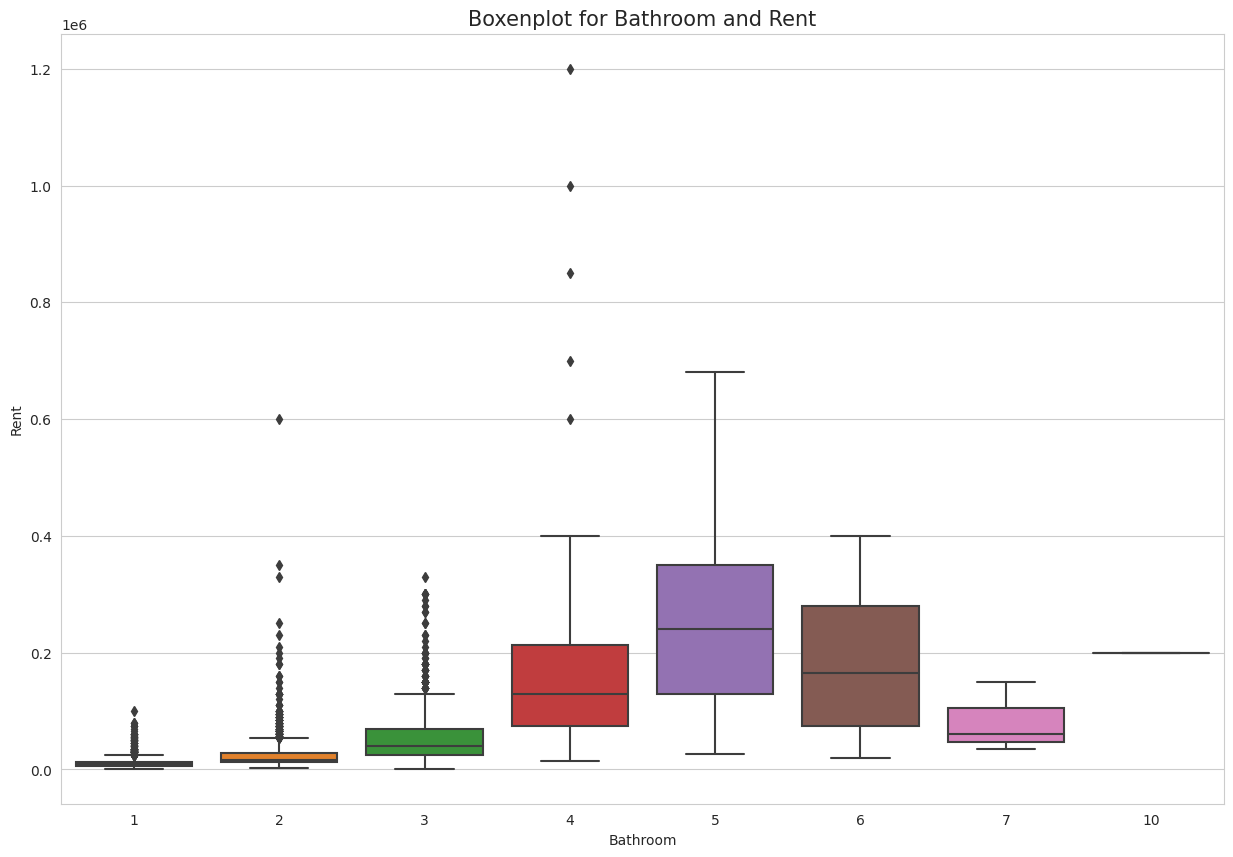

In [23]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(x="Bathroom", y='Rent',data=rent_data)
plt.title('Boxenplot for Bathroom and Rent',fontsize=15)
plt.show()

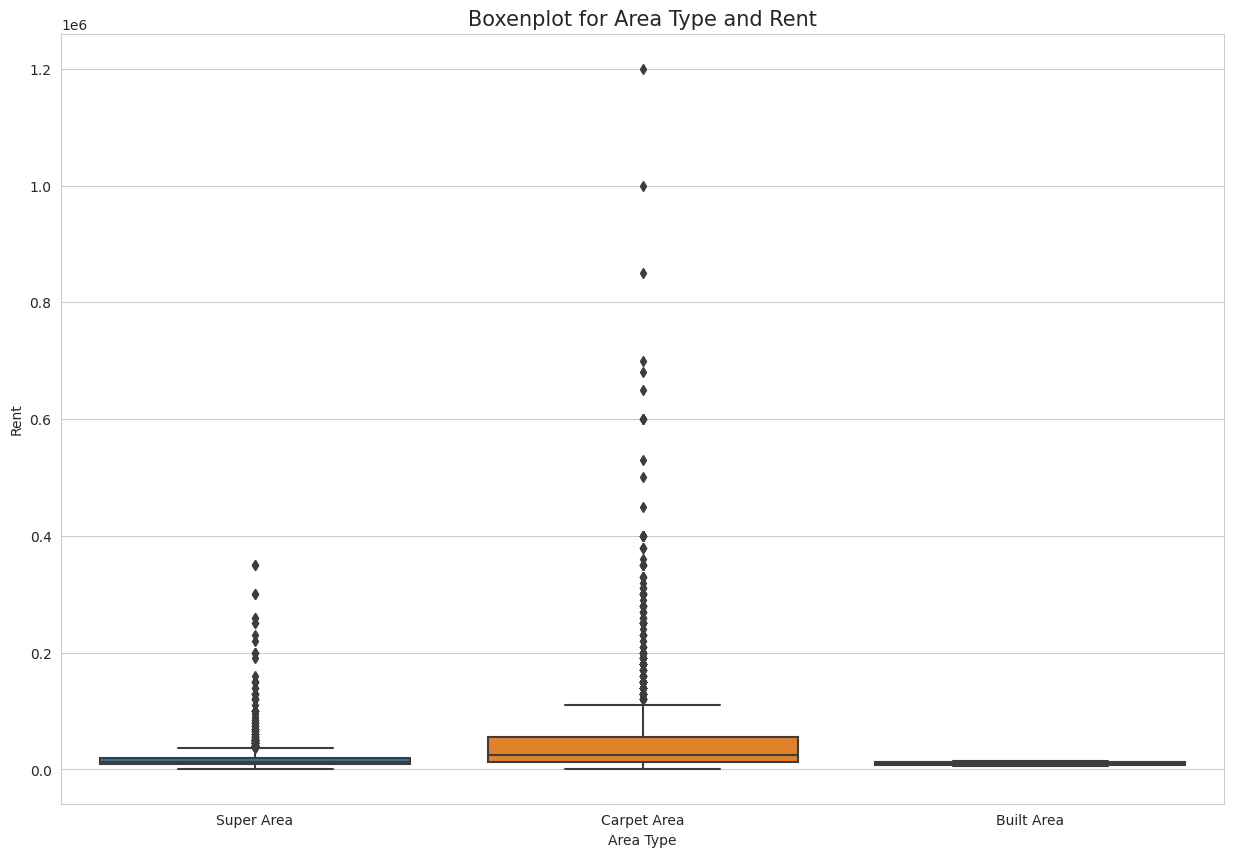

In [24]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(x="Area Type", y='Rent',data=rent_data)
plt.title('Boxenplot for Area Type and Rent',fontsize=15)
plt.show()

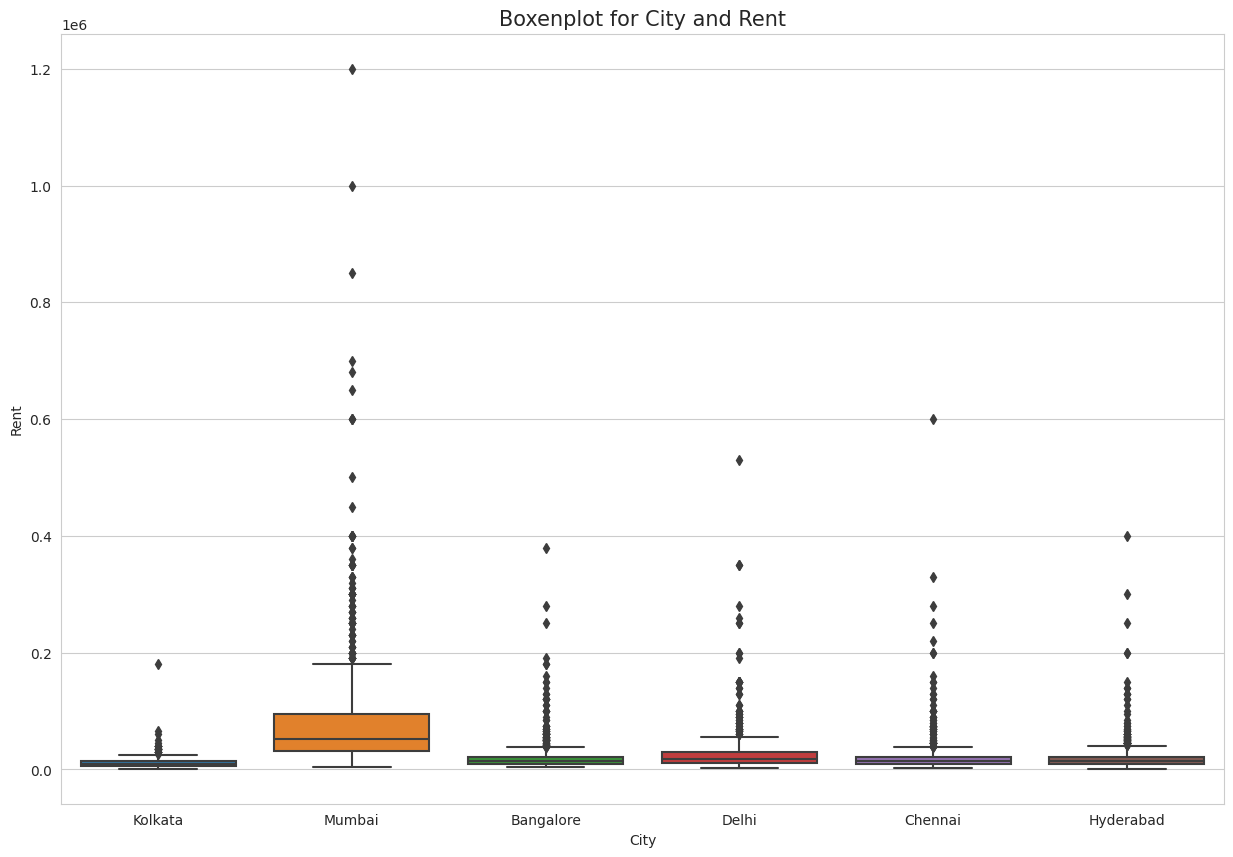

In [25]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(x="City", y='Rent',data=rent_data)
plt.title('Boxenplot for City and Rent',fontsize=15)
plt.show()

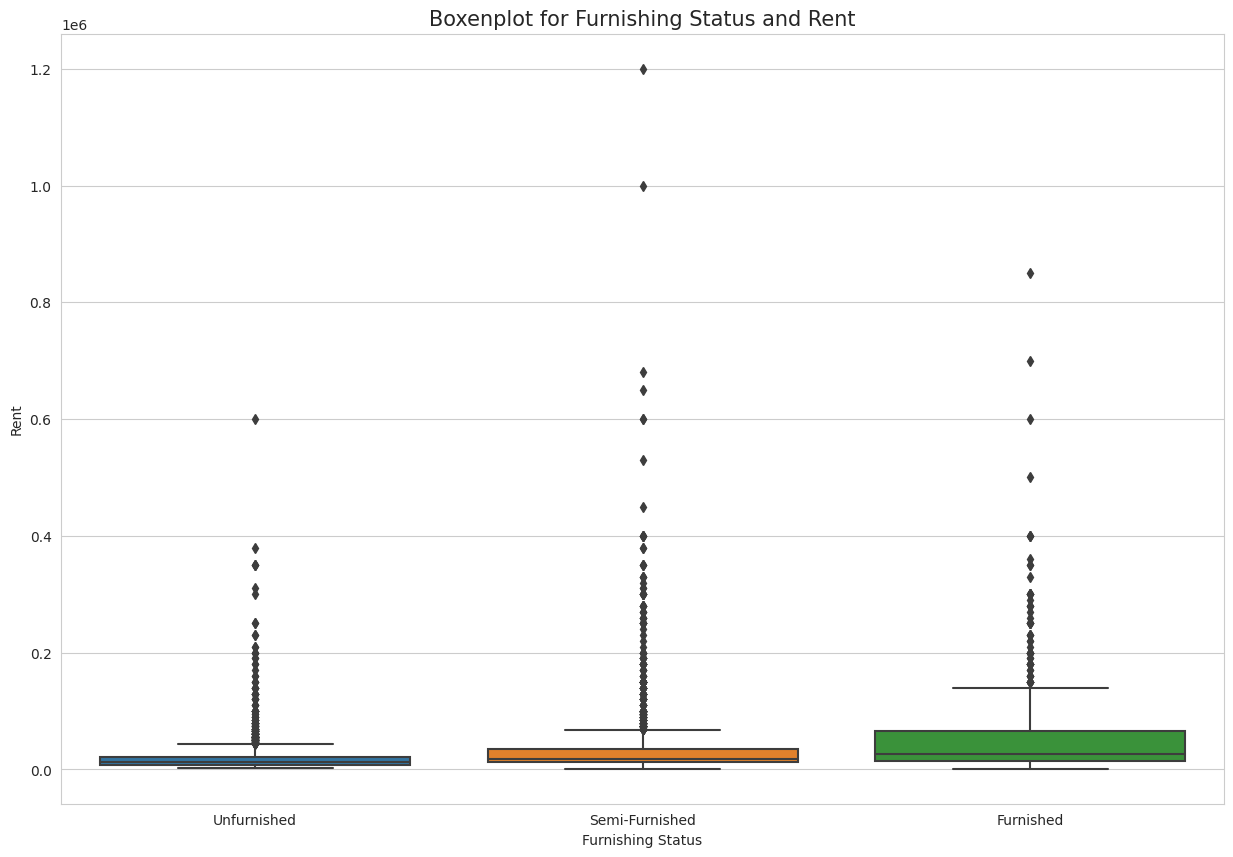

In [26]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(x="Furnishing Status", y='Rent',data=rent_data)
plt.title('Boxenplot for Furnishing Status and Rent',fontsize=15)
plt.show()

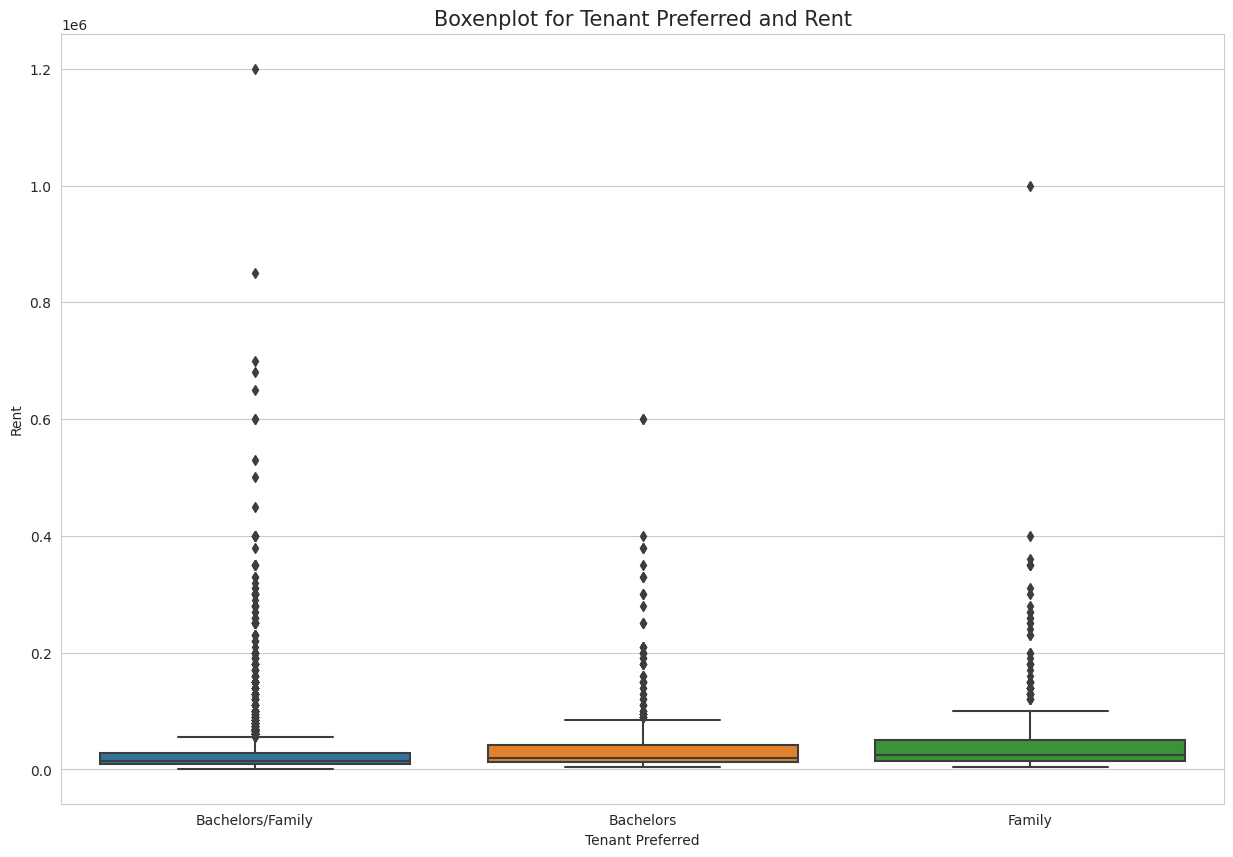

In [27]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(x="Tenant Preferred", y='Rent',data=rent_data)
plt.title('Boxenplot for Tenant Preferred and Rent',fontsize=15)
plt.show()

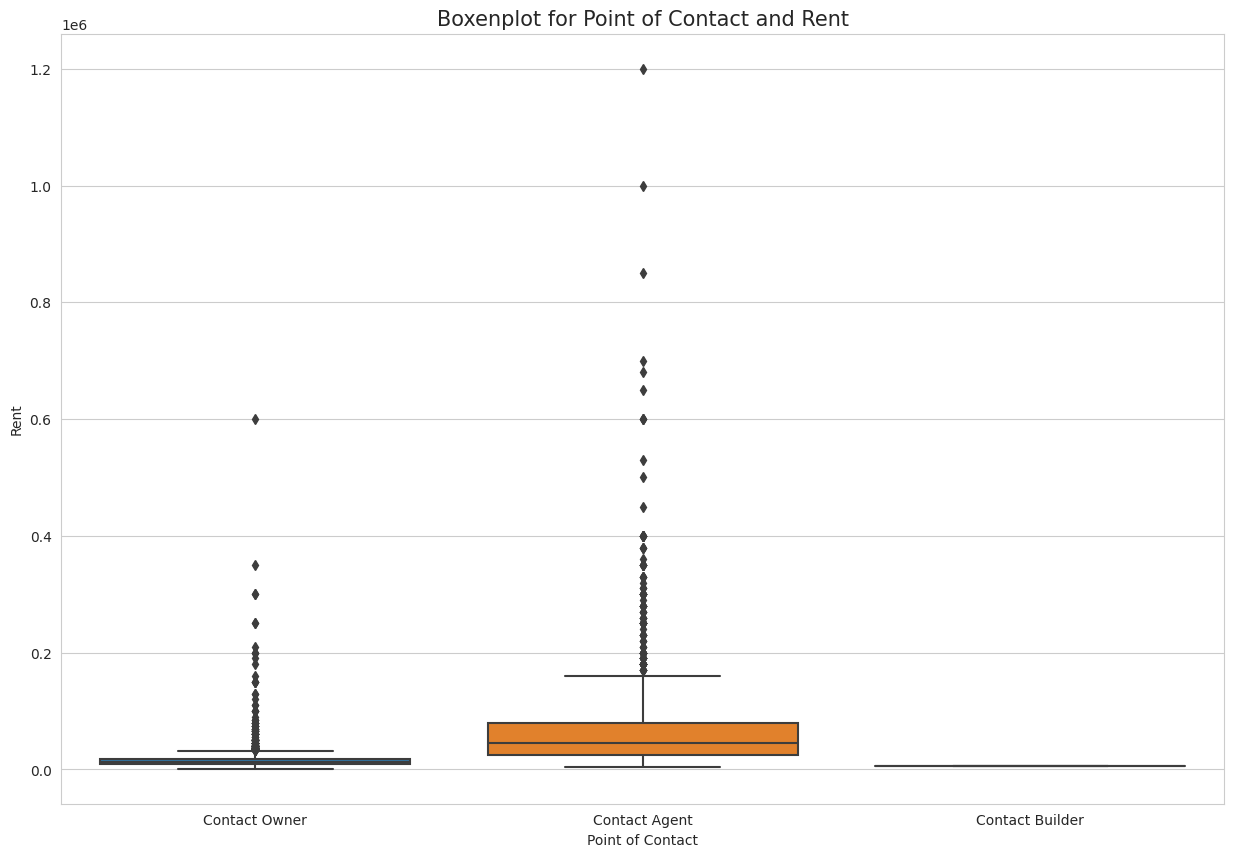

In [28]:
fig,axes = plt.subplots(figsize=(15,10))
sns.boxplot(x="Point of Contact", y='Rent',data=rent_data)
plt.title('Boxenplot for Point of Contact and Rent',fontsize=15)
plt.show()

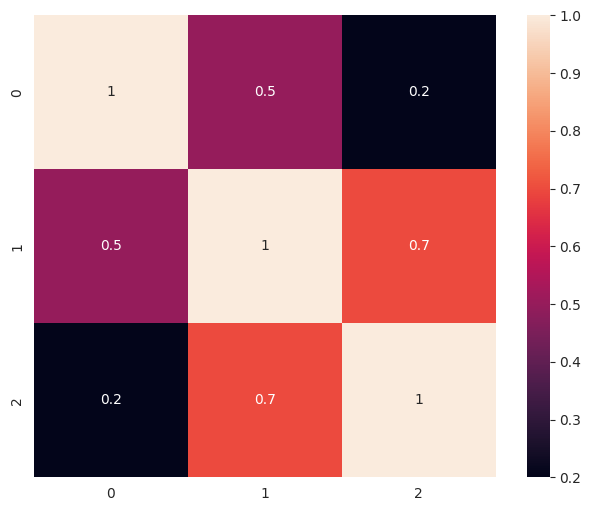

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a sample correlation matrix
corr = np.array([[1, 0.5, 0.2], [0.5, 1, 0.7], [0.2, 0.7, 1]])

plt.subplots(figsize=(8, 6))
sns.heatmap(corr, vmax=1, square=True, annot=True)
plt.show()

In [30]:
##Dropping unnecesaary columns from dataset
rent_data = rent_data.drop(['Posted On','Area Locality','Floor'],axis=1)
rent_data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [31]:
rent_data = pd.get_dummies(rent_data, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
rent_data.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,2,20000,800,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,2,17000,1000,1,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
3,2,10000,800,1,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2,7500,850,1,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True


In [32]:
X = rent_data.drop('Rent',axis=1)
y = rent_data['Rent']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [34]:
# Scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [35]:
  print(X_train,y_train)

[[-1.29973557 -0.41868795 -1.09947045 ... -0.68565262 -0.01735525
   0.68612724]
 [-0.10471292 -0.41868795 -1.09947045 ... -0.68565262 -0.01735525
   0.68612724]
 [-0.10471292  0.36670492  0.04443349 ... -0.68565262 -0.01735525
   0.68612724]
 ...
 [-0.10471292 -0.18307009  0.04443349 ... -0.68565262 -0.01735525
   0.68612724]
 [-1.29973557 -0.96846295 -1.09947045 ... -0.68565262 -0.01735525
   0.68612724]
 [-1.29973557 -0.81138438  0.04443349 ...  1.45846448 -0.01735525
  -1.45745561]] [[-0.42245895]
 [-0.39738427]
 [-0.3388767 ]
 ...
 [-0.1717122 ]
 [-0.4726083 ]
 [-0.15499575]]


In [36]:
from sklearn import metrics
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

# Evaluation metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)

In [37]:
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 346609450698.9006
MSE: 1.8925781164513368e+23
RMSE: 435037712899.85156
